In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.optimize as sp

In [3]:
import pandas as pd

overnight = pd.read_csv('../Data/Experiment 1/experiment1overnight.tsv', sep='\t', skiprows=8, usecols=[0, 1, 2, 3])

background = pd.read_csv('../Data/Experiment 1/Background.tsv', sep='\t', skiprows=8, usecols=[0, 1, 2, 3])

silver = pd.read_csv('../Data/Experiment 3/good silver do use.tsv',sep ='\t', skiprows=8, usecols=[0,1,2,3])

silverbg = pd.read_csv('../Data/Experiment 3/Exp3 background.tsv',sep ='\t', skiprows=8, usecols=[0,1,2,3])

twentycoincsv = pd.read_csv('../Data/Experiment 5/20centcoin.tsv',sep ='\t', skiprows=8, usecols=[0,1,2,3])

brasscsv = pd.read_csv('../Data/Experiment 5/Brass Coin.tsv',sep ='\t', skiprows=8, usecols=[0,1,2,3])

coppercsv = pd.read_csv('../Data/Experiment 5/Copper.tsv',sep ='\t', skiprows=8, usecols=[0,1,2,3])

In [4]:
#Model

def target(t,k,l):
    return k/l * (1-np.exp(-l*t))

def decay(t,l,n_0):
    return n_0 * np.exp(-l*t)

def line(x,m,c):
    return m*x+c

In [5]:
#Background 

bg = [148, 153, 126, 147]

avgbg = sum(bg)/len(bg)
print(avgbg)

143.5


[2.37774893e-06 1.57660041e+01]
0.013386746391727303


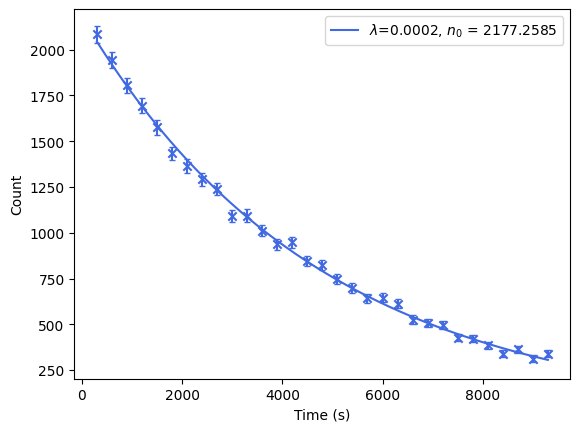

In [16]:
#Experiment 1

y = overnight['Unnamed: 2'][1:].tolist()
y = [int(item) for item in y]
x = [300 + 300*i for i in range(len(y))]

for i in range(len(y)):
    y[i] = y[i] - 144

plt.scatter(
    x,
    y,
    marker='x',
    color='royalblue'
)

param,covariance = sp.curve_fit(decay,x,y,p0=[0.01,100000])
perr = np.sqrt(np.diag(covariance))
print(perr)
err = np.sqrt((perr[0]/param[0])**2 + (perr[1]/param[1])**2) #Uncertainty calculation
print(err)
x_smooth = np.linspace(x[0],x[-1],1000)
y_smooth = decay(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$\lambda$={param[0]:.4f}, $n_0$ = {param[1]:.4f}',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=np.sqrt(y),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.xlabel('Time (s)')
plt.ylabel('Count')

plt.legend(loc='upper right')
plt.savefig("../Figures/exp1graph.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()


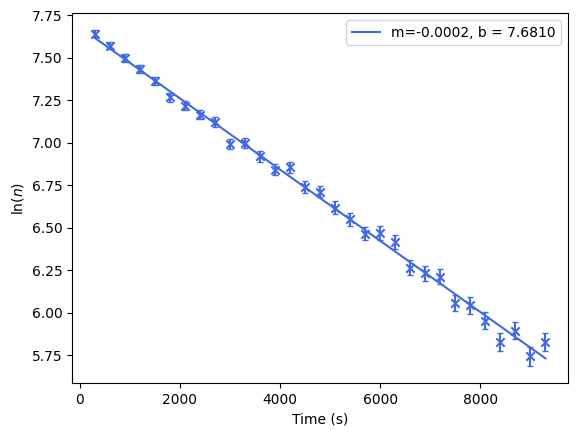

In [7]:
#Experiment 1 log linear

y = overnight['Unnamed: 2'][1:].tolist()
y = [int(item) for item in y]
x = [300 + 300*i for i in range(len(y))]

for i in range(len(y)):
    y[i] = np.log(y[i] - 144)

plt.scatter(
    x,
    y,
    marker='x',
    color='royalblue'
)

param,covariance = sp.curve_fit(line,x,y)
x_smooth = np.linspace(x[0],x[-1],1000)
y_smooth = line(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'm={param[0]:.4f}, b = {param[1]:.4f}',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=1/np.sqrt(np.exp(y)),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.legend(loc='upper right')

plt.xlabel('Time (s)')
plt.ylabel(r'$\ln(n)$')

plt.savefig("../Figures/exp1graphl.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()


3537.5523932135447
0.5133779492627127
1816.1013930373713


/var/folders/36/7tk34cnx7ln37s2qkhnchxcw0000gn/T/ipykernel_2719/1233477603.py:4: RuntimeWarning: overflow encountered in exp
  return k/l * (1-np.exp(-l*t))


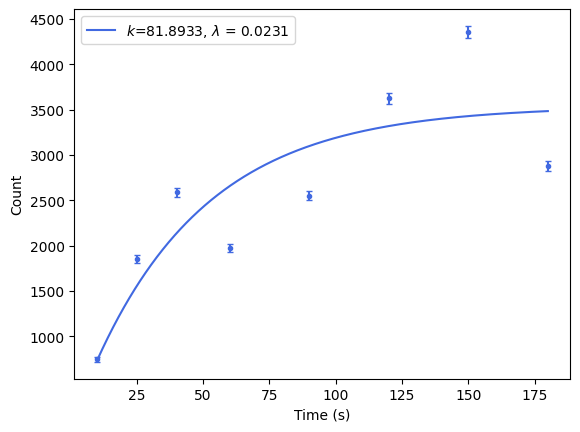

In [18]:
#Experiment 2 

x = [10,25,40,60,90,120,150,180]
y = [753/1.01,1870/1.01,2614/1.01,2034/1.03,2625/1.03,3622,4704/1.08,3391/1.18]

plt.scatter(
    x,
    y,
    marker='.',
    color='royalblue'
)

param,covariance = sp.curve_fit(target,x,y)
print(param[0]/param[1])
perr = np.sqrt(np.diag(covariance))
err = np.sqrt((perr[0]/param[0])**2 + (perr[1]/param[1])**2)
print(err)
print(param[0]/param[1]*err)
x_smooth = np.linspace(x[0],x[-1],1000)
y_smooth = target(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$k$={param[0]:.4f}, $\lambda$ = {param[1]:.4f}',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=np.sqrt(y),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.xlabel('Time (s)')
plt.ylabel('Count')

plt.legend(loc='upper left')
plt.savefig("../Figures/exp2graph.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()

/var/folders/36/7tk34cnx7ln37s2qkhnchxcw0000gn/T/ipykernel_2719/3612899451.py:32: RuntimeWarning: overflow encountered in exp
  yerr=1/np.sqrt(np.exp(y)),


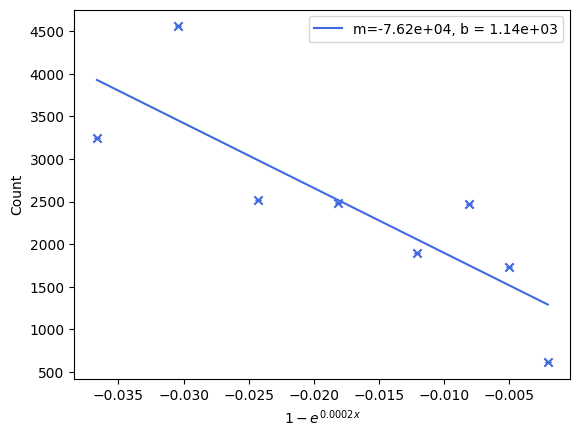

In [9]:
#Experiment 2 log linear

x = [10,25,40,60,90,120,150,180] 
y = [753,1870,2614,2034,2625,2663,4704,3391]

for i in range(len(y)):
    y[i] = y[i] - 144

for i in range(len(x)):
    x[i] = 1-np.exp(float(x[i]) * 0.0002)

plt.scatter(
    x,
    y,
    marker='x',
    color='royalblue'
)

param,covariance = sp.curve_fit(line,x,y)
x_smooth = np.linspace(x[0],x[-1],1000)
y_smooth = line(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'm={param[0]:.2e}, b = {param[1]:.2e}',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=1/np.sqrt(np.exp(y)),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.xlabel(r'$1-e^{0.0002x}$')
plt.ylabel('Count')

plt.legend(loc='upper right')
plt.savefig("../Figures/exp2graphl.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()


1.3106352431895676


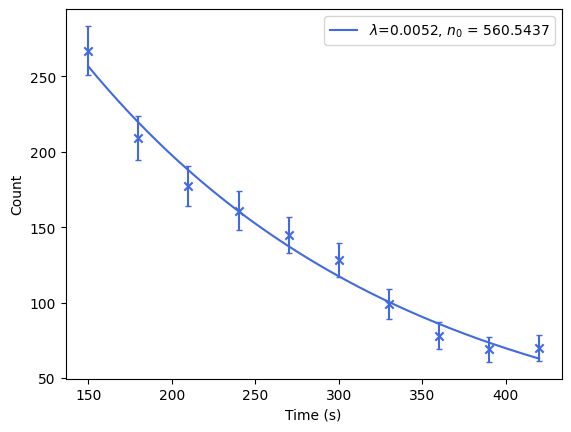

In [10]:
#Experiment 3

x = [0 + 30*i for i in range(15)]
y = silver['Unnamed: 2'][1:].tolist()
y = [int(item) for item in y]

plt.scatter(
    x[5:],
    y[5:],
    marker='x',
    color='royalblue'
)

param,covariance = sp.curve_fit(decay,x[5:],y[5:],p0=[0.01,100000])
perr = np.sqrt(np.diag(covariance))
err = np.sqrt((perr[0]/param[0])**2 + (perr[1]/param[1])**2)
print(16.5*err)
x_smooth = np.linspace(x[5],x[-1],1000)
y_smooth = decay(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$\lambda$={param[0]:.4f}, $n_0$ = {param[1]:.4f}',
    color='royalblue'
)

plt.errorbar(
    x[5:],
    y[5:],
    yerr=np.sqrt(y[5:]),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.xlabel('Time (s)')
plt.ylabel('Count')

plt.legend(loc='upper right')
plt.savefig("../Figures/exp3graph.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()


6.910853403083772 7.049642310314347 6.772064495853197


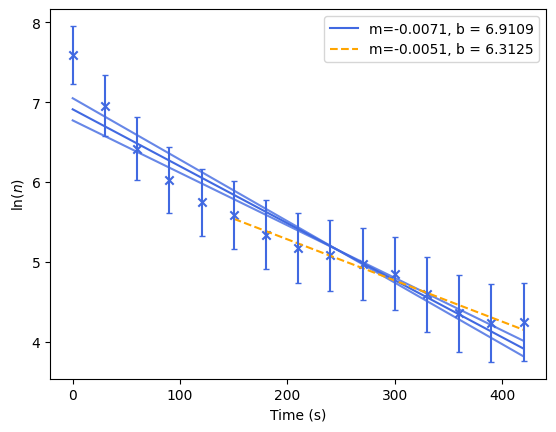

In [11]:
#Experiment 3 log linear

x = [0 + 30*i for i in range(15)]
y = silver['Unnamed: 2'][1:].tolist()
y = [int(item) for item in y]
y = np.log(y)

plt.scatter(
    x,
    y,
    marker='x',
    color='royalblue'
)

param,covariance = sp.curve_fit(line,x,y,p0=[0.01,100000])
perr = np.sqrt(np.diag(covariance))
x_smooth = np.linspace(x[0],x[-1],1000)
y_smooth = line(x_smooth,*param)
y_smooth1 = line(x_smooth, param[0] - perr[0], param[1] + perr[1])
y_smooth2 = line(x_smooth, param[0] + perr[0], param[1] - perr[1])
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'm={param[0]:.4f}, b = {param[1]:.4f}',
    color='royalblue'
)

plt.plot(
    x_smooth,
    y_smooth1,
    color='royalblue',
    alpha=0.8
)

plt.plot(
    x_smooth,
    y_smooth2,
    color='royalblue',
    alpha=0.8
)

param1,covariance1 = sp.curve_fit(line,x[5:],y[5:],p0=[0.01,100000])
x_smooth = np.linspace(x[5],x[-1],1000)
y_smooth3 = line(x_smooth,*param1)
plt.plot(
    x_smooth,
    y_smooth3,
    label=rf'm={param1[0]:.4f}, b = {param1[1]:.4f}',
    color='orange',
    linestyle='--'
)

plt.errorbar(
    x,
    y,
    yerr=1/np.sqrt(y),
    linestyle='',
    capsize=2,
    c='royalblue'
)

print(y_smooth[0],y_smooth1[0],y_smooth2[0])

plt.xlabel('Time (s)')
plt.ylabel(r'$\ln(n)$')

plt.legend(loc='upper right')
plt.savefig("../Figures/exp3graphl.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()


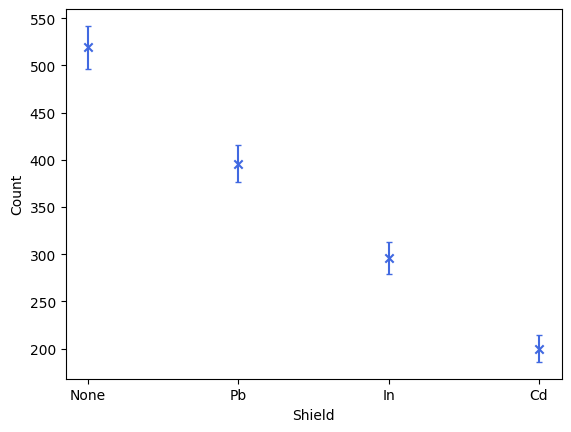

In [12]:
# Experiment 4 

shield = {'None': 519, 'Pb':396, 'In':296, 'Cd':200}

x = list(shield.keys())
y = list(shield.values())

plt.scatter(
    x,
    y,
    marker='x',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=np.sqrt(y),
    linestyle='',
    capsize=2,
    c='royalblue'
)

plt.xlabel('Shield')
plt.ylabel('Count')

plt.savefig("../Figures/exp4graph.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()

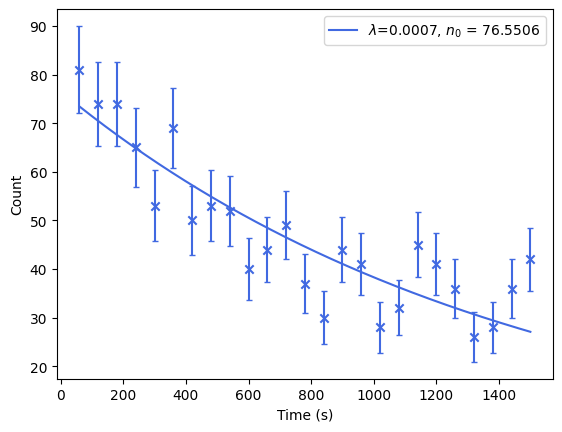

In [13]:
#Experiment 5
brass = brasscsv['Unnamed: 2'][1:].tolist()
brass = [int(item) for item in brass]

copper = coppercsv['Unnamed: 2'][1:].tolist()
copper = [int(item) for item in copper]

twentycoin = twentycoincsv['Unnamed: 2'][1:].tolist()
twentycoin = [int(item) for item in twentycoin]

time = [60 + 60*i for i in range(len(brass))]

plt.scatter(
    time,
    copper,
    marker='x',
    color='royalblue'
)

plt.errorbar(
    time,
    copper,
    yerr=np.sqrt(copper),
    linestyle='',
    capsize=2,
    c='royalblue'
)

param,covariance = sp.curve_fit(decay,time,copper,p0=[0.01,100000])
x_smooth = np.linspace(time[0],time[-1],1000)
y_smooth = decay(x_smooth,*param)

plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$\lambda$={param[0]:.4f}, $n_0$ = {param[1]:.4f}',
    color='royalblue'
)

plt.xlabel('Time (s)')
plt.ylabel('Count')

plt.legend(loc='upper right')
plt.savefig("../Figures/exp5graph.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()

87.36731027782908
97.92836730244194


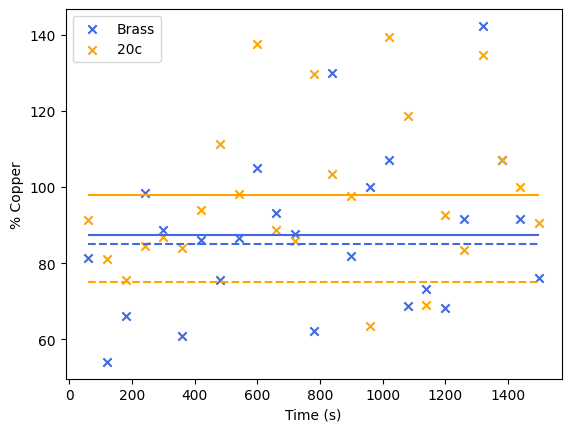

In [19]:
coppercontentbrass = [100*brass[i]/copper[i] for i in range(len(brass))]
coppercontenttwenty = [100*twentycoin[i]/copper[i] for i in range(len(copper))] 

plt.scatter(
    time,
    coppercontentbrass,
    marker='x',
    c='royalblue',
    label='Brass'
)

plt.scatter(
    time,
    coppercontenttwenty,
    marker='x',
    c='orange',
    label='20c'
)

plt.hlines(
    y=sum(coppercontentbrass)/len(coppercontentbrass),
    color='royalblue',
    xmin=time[0],
    xmax=time[-1]
)

plt.hlines(
    y=sum(coppercontenttwenty)/len(coppercontenttwenty),
    color='orange',
    xmin=time[0],
    xmax=time[-1]
)

plt.hlines(
    y=85,
    color='royalblue',
    xmin=time[0],
    xmax=time[-1],
    linestyles='--'
)

plt.hlines(
    y=75,
    color='orange',
    xmin=time[0],
    xmax=time[-1],
    linestyles='--'
)

print(sum(coppercontentbrass)/len(coppercontentbrass))
print(sum(coppercontenttwenty)/len(coppercontenttwenty))
plt.xlabel('Time (s)')
plt.ylabel('% Copper')
plt.legend()
plt.savefig("../Figures/exp5graph2.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()

In [17]:
(58-57.5)/58

0.008620689655172414